# BEGINNER LEVEL TASK
# Task 2:Stock Market Prediction And Forecasting Using Stacked LSTM

### 1 - Importing Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 2 - Reading Dataset

In [2]:
data = pd.read_csv('NSE-TATAGLOBAL11.csv')
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [3]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [5]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [6]:
data['Date'].value_counts()

2018-10-08    1
2015-06-15    1
2015-06-04    1
2015-06-05    1
2015-06-08    1
             ..
2017-02-09    1
2017-02-10    1
2017-02-13    1
2017-02-14    1
2013-10-08    1
Name: Date, Length: 1235, dtype: int64

### 3 - Data Visualization

<Axes: >

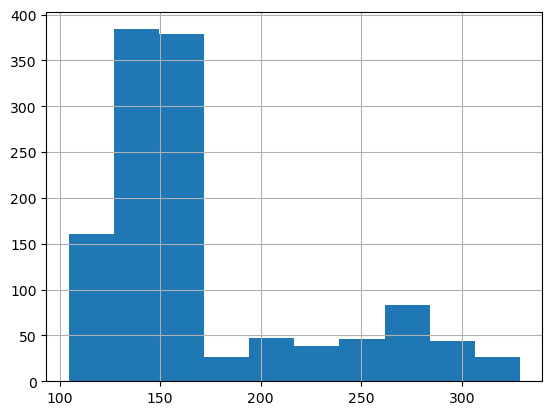

In [7]:
data['High'].hist()

<Axes: >

<Figure size 2000x800 with 0 Axes>

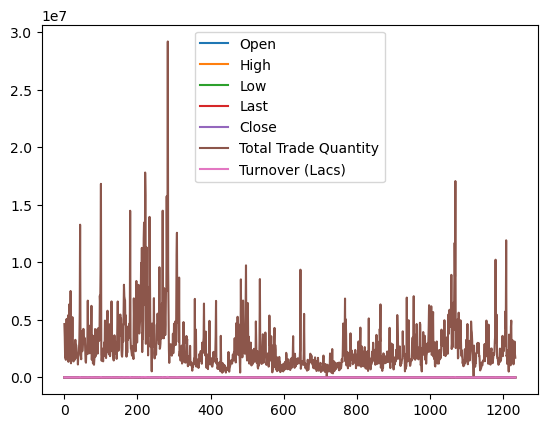

In [8]:
plt.figure(figsize=(20,8))
data.plot()

In [9]:
data_set = data.filter(['Close'])
dataset = data.values
training_data_len=math.ceil(len(data) * 8)
training_data_len

9880

In [10]:
dataset

array([['2018-10-08', 208.0, 222.25, ..., 215.15, 4642146.0, 10062.83],
       ['2018-10-05', 217.0, 218.6, ..., 209.2, 3519515.0, 7407.06],
       ['2018-10-04', 223.5, 227.8, ..., 218.2, 1728786.0, 3815.79],
       ...,
       ['2013-10-10', 156.0, 160.8, ..., 160.15, 3124853.0, 4978.8],
       ['2013-10-09', 155.7, 158.2, ..., 155.55, 2049580.0, 3204.49],
       ['2013-10-08', 157.0, 157.8, ..., 155.8, 1720413.0, 2688.94]],
      dtype=object)

In [11]:
data = data.iloc[:, 0:5]
data

,Date,Open,High,Low,Last
0,2018-10-08,208.00,222.25,206.85,216.00
1,2018-10-05,217.00,218.60,205.90,210.25
2,2018-10-04,223.50,227.80,216.15,217.25
3,2018-10-03,230.00,237.50,225.75,226.45
4,2018-10-01,234.55,234.60,221.05,230.30
...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30
1231,2013-10-11,161.15,163.45,159.00,159.80
1232,2013-10-10,156.00,160.80,155.85,160.30
1233,2013-10-09,155.70,158.20,154.15,155.30


In [12]:
training_set = data.iloc[:, 1:2].values
training_set

array([[208. ],
       [217. ],
       [223.5],
       ...,
       [156. ],
       [155.7],
       [157. ]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_training_scaled = scaler.fit_transform(training_set)

In [14]:
features_set = []
labels = []
for i in range(60, 586):
    features_set.append(data_training_scaled[i - 60:i, 0])
    labels.append(data_training_scaled[i, 0])

In [15]:
features_set, labels = np.array(features_set), np.array(labels)

In [16]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

### 4 - LSTM

In [17]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [18]:
model = Sequential()

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.fit(features_set, labels, epochs=50, batch_size=20)

Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 2/50
27/27 [==============================] - 0s 946us/step - loss: 0.0144
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 5/50
27/27 [==============================] - 0s 614us/step - loss: 0.0144
Epoch 6/50
27/27 [==============================] - 0s 851us/step - loss: 0.0144
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 8/50
27/27 [==============================] - ETA: 0s - loss: 0.013 - 0s 849us/step - loss: 0.0144
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 11/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 12/50
27/27 [==============================] - 0s 730us/step - loss: 0.0144
Epoch 13/50
27/

In [22]:
data_testing_complete = pd.read_csv('NSE-TATAGLOBAL11.csv')
data_testing_processed = data_testing_complete.iloc[:, 1:2]
data_testing_processed

,Open
0,208.00
1,217.00
2,223.50
3,230.00
4,234.55
...,...
1230,160.85
1231,161.15
1232,156.00
1233,155.70


In [23]:
data_total = pd.concat((data['Open'], data['Open']), axis=0)

In [24]:
test_inputs = data_total[len(data_total) - len(data) - 60:].values
test_inputs.shape

(1295,)

In [25]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

In [26]:
test_feature =[]
for i in range(60, 89):
    test_feature.append(test_inputs[i-60:i, 0])

In [27]:
test_feature = np.array(test_feature)
test_feature = np.reshape(test_feature, (test_feature.shape[0] - test_feature.shape[1], 1))
test_feature.shape

(1740, 1)

In [28]:
predictions = model.predict(test_feature)

In [29]:
predictions

array([[0.25589675],
       [0.2574544 ],
       [0.25144637],
       ...,
       [0.582332  ],
       [0.59635067],
       [0.57320875]], dtype=float32)

In [30]:
x_train = data[0:1256]
y_train = data[1:1257]
print(x_train.shape)
print(y_train.shape)

(1235, 5)
(1234, 5)


In [31]:
x_train

,Date,Open,High,Low,Last
0,2018-10-08,208.00,222.25,206.85,216.00
1,2018-10-05,217.00,218.60,205.90,210.25
2,2018-10-04,223.50,227.80,216.15,217.25
3,2018-10-03,230.00,237.50,225.75,226.45
4,2018-10-01,234.55,234.60,221.05,230.30
...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30
1231,2013-10-11,161.15,163.45,159.00,159.80
1232,2013-10-10,156.00,160.80,155.85,160.30
1233,2013-10-09,155.70,158.20,154.15,155.30


In [32]:
np.random.seed(1)
np.random.randn(3, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [33]:
np.random.normal(1)

0.7506296245225899

In [34]:
np.random.normal(5)

6.4621079370449745

In [35]:
np.random.seed(42)

In [38]:
np.random.normal(size=1000, scale=100).std()

98.29624309682332

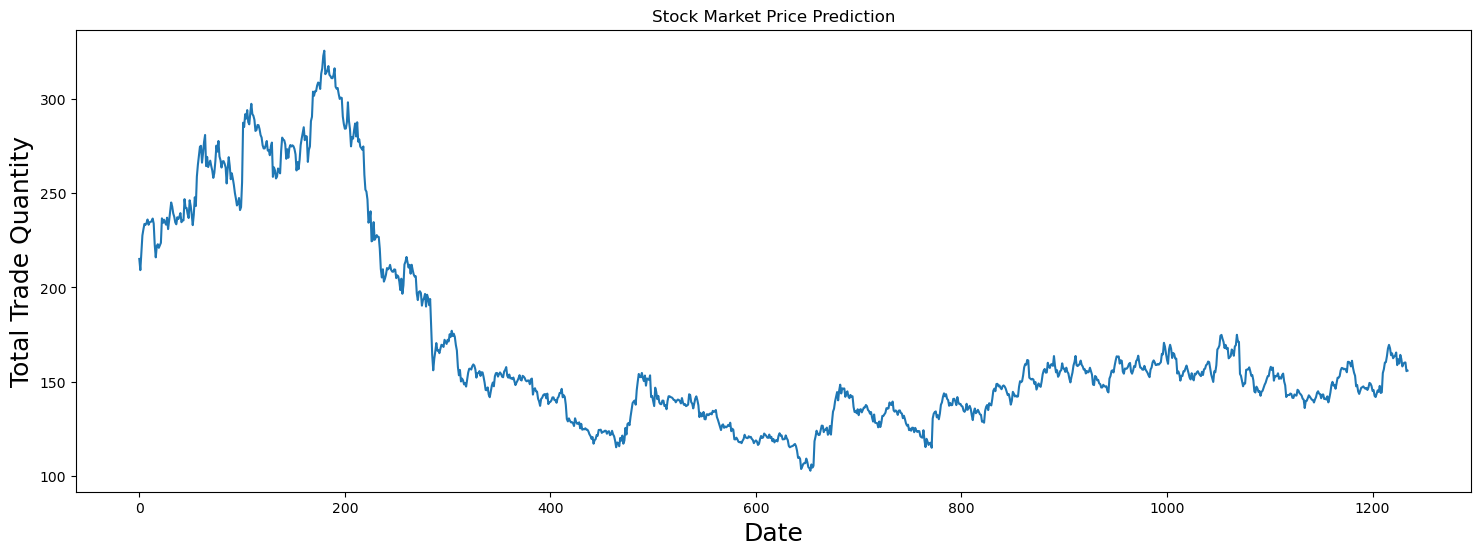

In [39]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

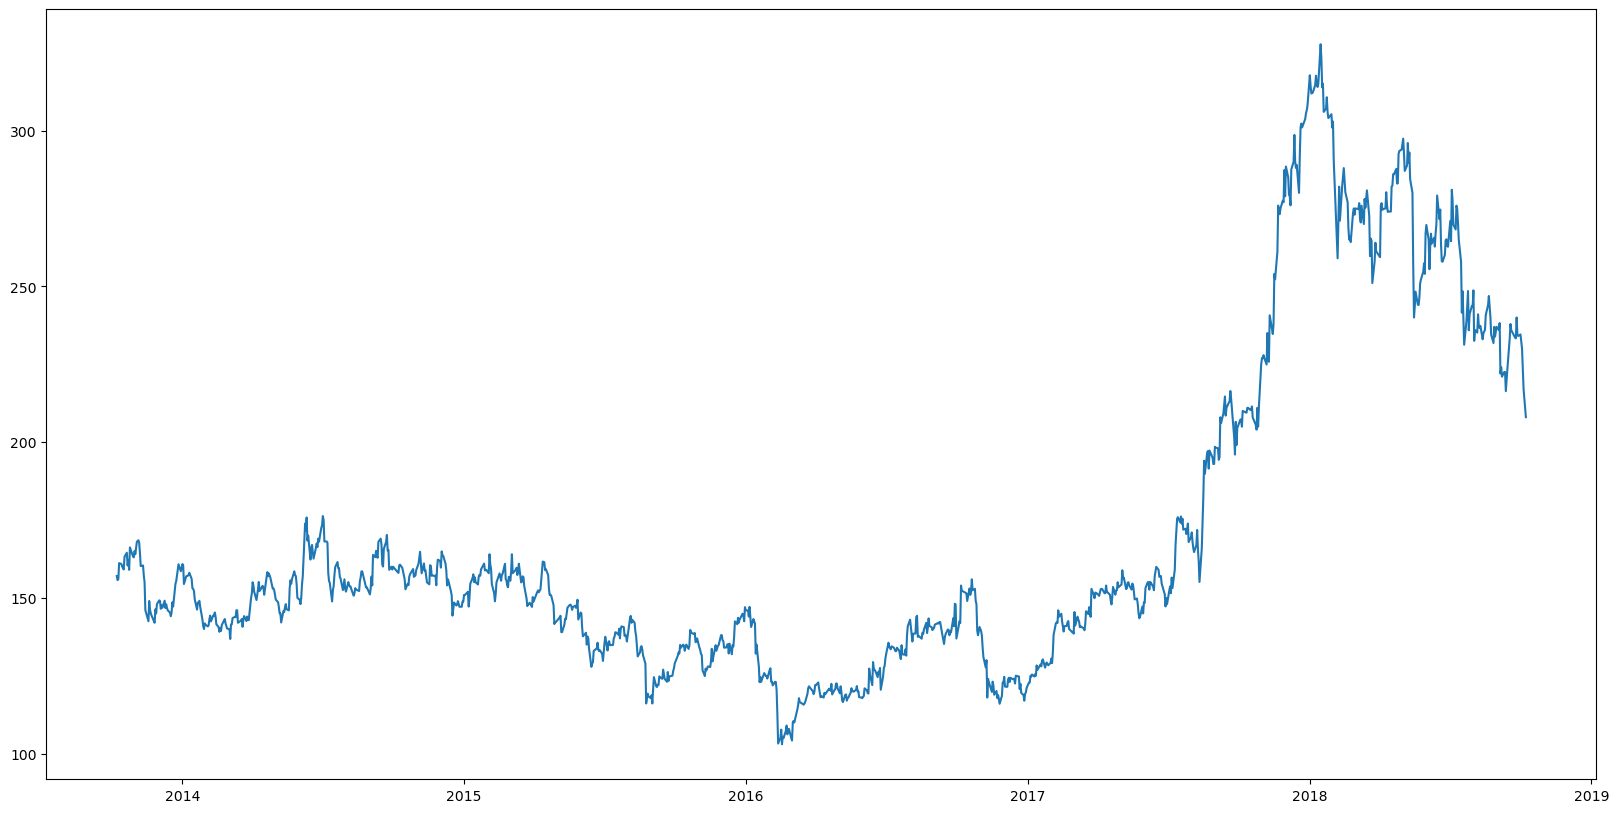

In [40]:
data["Date"] = pd.to_datetime(data.Date)
data.index = data['Date']

plt.figure(figsize=(20, 10))
plt.plot(data["Open"], label='ClosePriceHist')

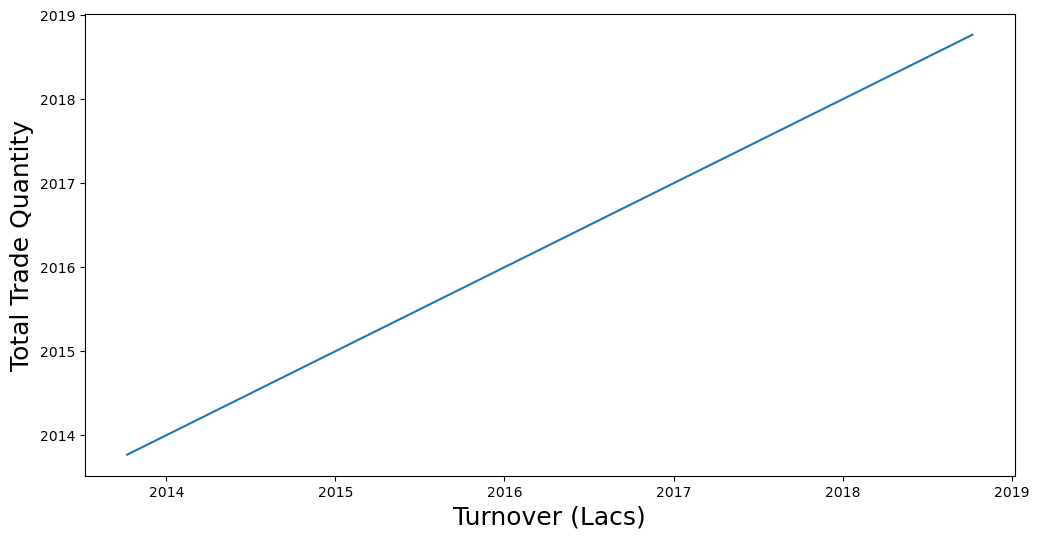

In [41]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

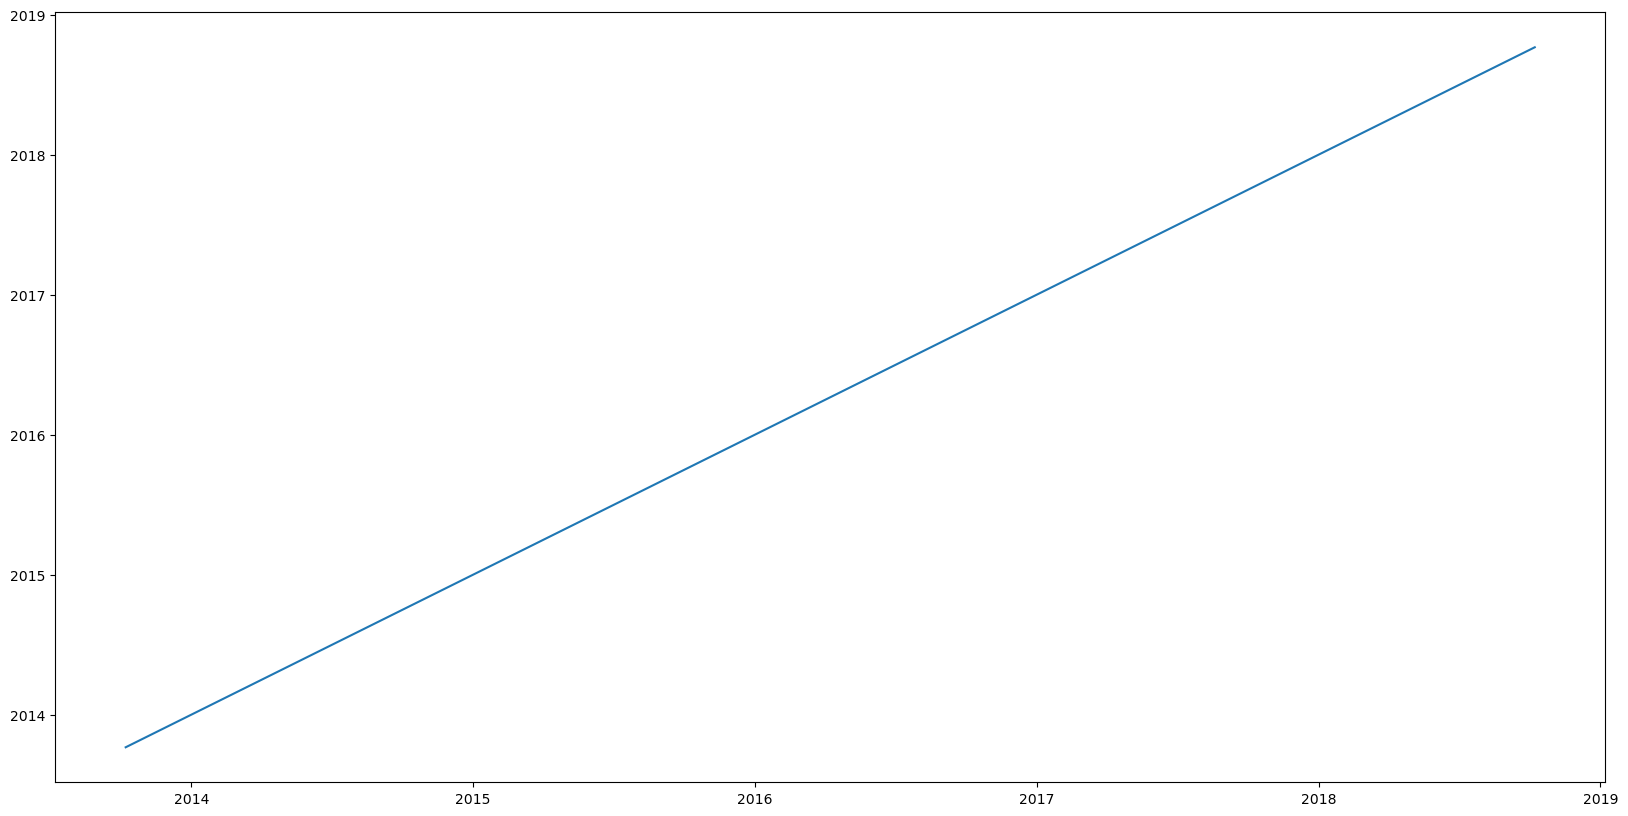

In [42]:
data["Turnover (Lacs)"] = pd.to_datetime(data.Date)
data.index = data['Turnover (Lacs)']

plt.figure(figsize=(20, 10))
plt.plot(data["Turnover (Lacs)"], label='ClosePriceHist')

<Axes: xlabel='Turnover (Lacs)'>

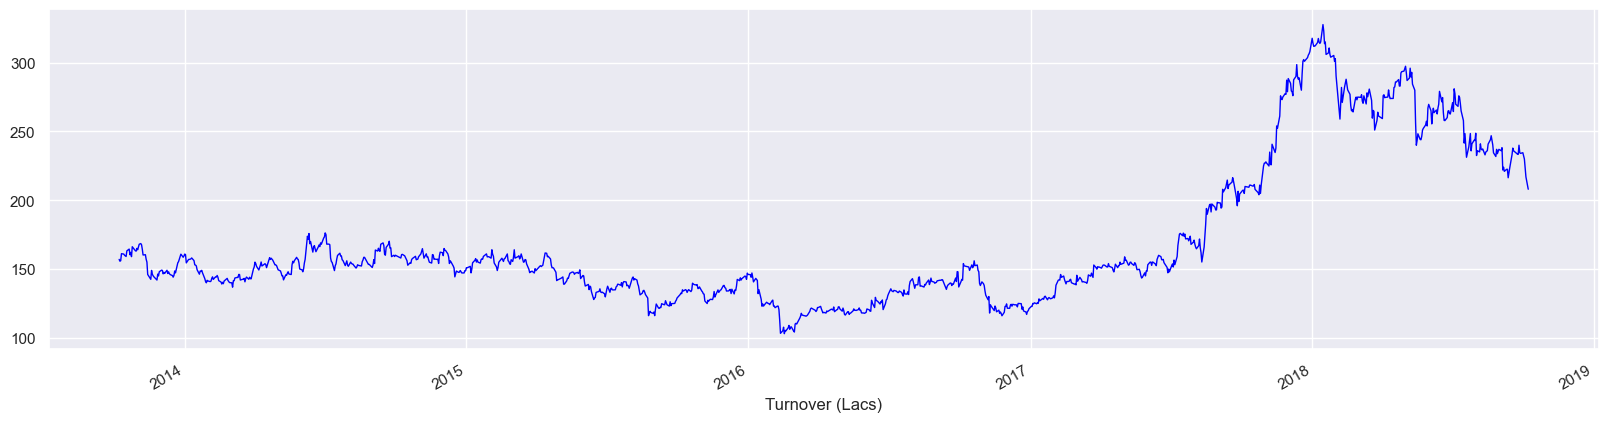

In [43]:
sns.set(rc = {'figure.figsize': (20, 5)})
data['Open'].plot(linewidth = 1,color='blue')

In [44]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Turnover (Lacs)'], dtype='object')

In [45]:
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


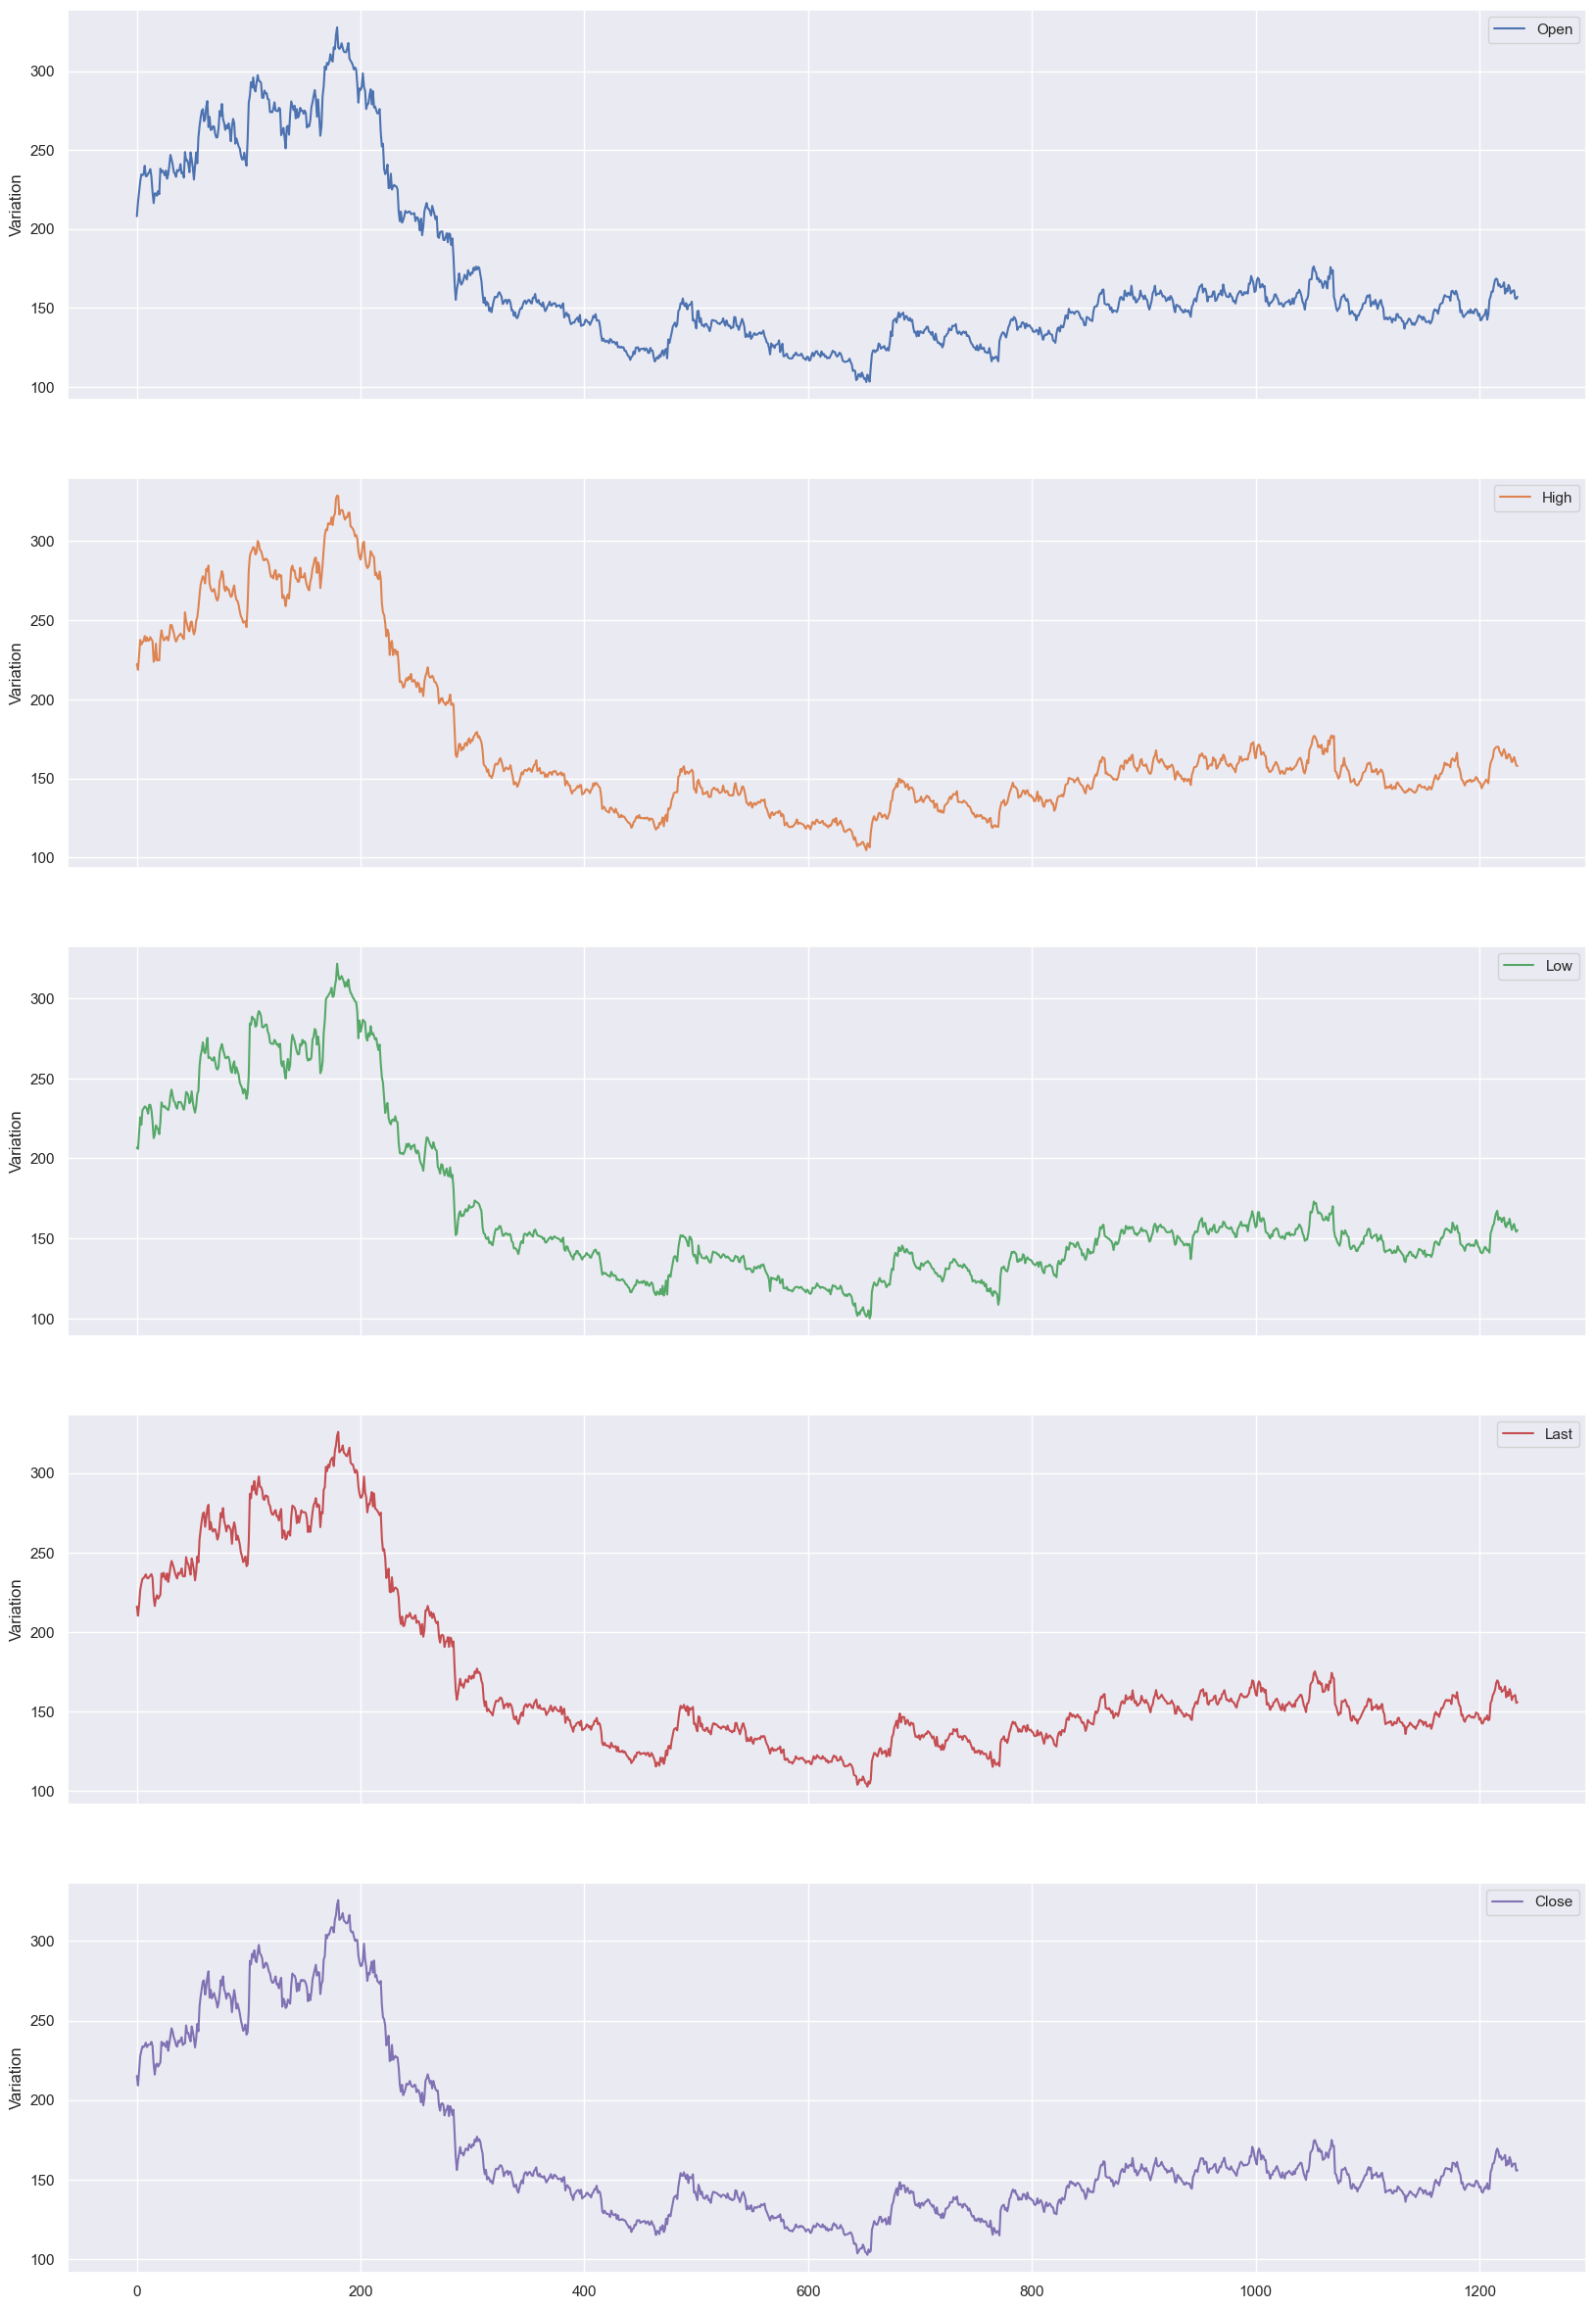

In [46]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

# Thank You!